In [15]:
from src.manipulator import REPAEManipulator, DiffusionCandidateList
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Diffusion Example
This notebooks shows how to manipulate the diffusion process in Latent Diffusion Models.

In [16]:
manipulator = REPAEManipulator(
    model_file="../models/generators/ldm_im.pt"
)
device = manipulator._device  # Select device used in manipulation

/home/weissl/Projects/SMOO/src/manipulator/_diffusion_manipulator/_repae_manipulator.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file)

In [45]:
candidates = DiffusionCandidateList.from_diffusion_output(*manipulator.get_diff_steps([1,2], n_steps=100), are_origin=[True, False]) # Get diffusion history and class embedding for two different classes.

In [46]:
n_steps = candidates.xts.shape[1] # Get number of steps in diffusion

In [ ]:
"""Here we make the manipulation strategy which takes 1 of the original in all steps except the ones defined below."""
weights_x = torch.ones(n_steps, device=device)
weights_y = torch.ones(n_steps, device=device)

for e in range(n_steps):  # This steps we do some actual manipulation.
    weights_x[e] = 1
    weights_y[e] = 1

x_weights = torch.stack([weights_x, 1-weights_x], dim=0)
y_weights = torch.stack([weights_y, 1-weights_y], dim=0)

# Now we manipulate the diffusion process
x_cur = manipulator.manipulate(candidates, x_weights, y_weights)

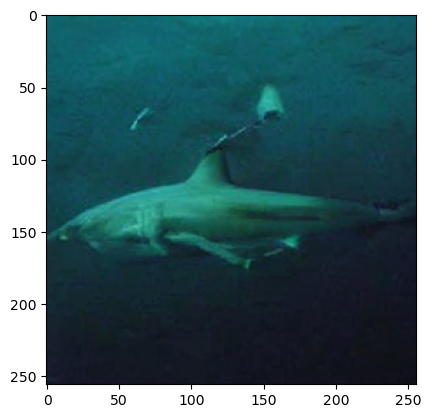

In [84]:
im = manipulator.get_image(x_cur)
fig, ax = plt.subplots(1,1)
ax.imshow(im.squeeze().cpu().numpy().transpose(1,2,0))  # Show generated image